In [1]:
from PIL import Image

In [2]:
import numpy as np

In [3]:
img_original = Image.open('stones.jpg', 'r') #Open the image

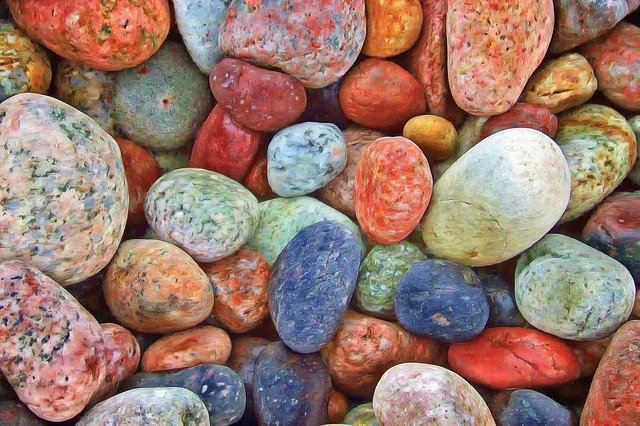

In [4]:
img_original

In [5]:
#Get pixel values in (total_pixels x 3) format with each column corresponding to R,G,B values
pixel_val = np.array(img_original.getdata()) 

In [6]:
print(pixel_val)

[[ 23   7   8]
 [ 30  14  14]
 [ 39  23  23]
 ...
 [134  75  57]
 [120  63  44]
 [129  74  54]]


In [7]:
def feature_normalize(pixel_val):
    m, n = pixel_val.shape # m rows, n columns
    mean = np.zeros((1, n)) # To store mean of each column
    std = np.zeros((1, n)) # To store standard deviation of each column
    
    for i in range(n):
        mean[:,i] = np.mean(pixel_val[:,i])
        std[:,i] = np.std(pixel_val[:,i])
    
    X = (pixel_val - mean) / std
    return X, mean, std
        

In [8]:
X, mean, std = feature_normalize(pixel_val)

In [9]:
print(X)

[[-2.30640557 -2.01457389 -1.72678948]
 [-2.18156875 -1.89048786 -1.62444156]
 [-2.02106427 -1.73094867 -1.47091968]
 ...
 [-0.32685029 -0.80916671 -0.89094811]
 [-0.57652393 -1.02188562 -1.11270194]
 [-0.41601945 -0.82689329 -0.94212207]]


In [10]:
K = 10 # No.of clusters

In [11]:
def initialize_centroids(X, K):
    X = np.unique(X, axis = 0) # All unique rows in X
    X = np.random.permutation(X) # Permutate X
    centroids = X[1:K+1,:]
    return centroids

In [12]:
def cluster_assignment(centroids, X, K):
    m, n = X.shape
    temp = np.zeros((m,K)) # To store the distance between each row in X and the centroids
    
    for i in range(K):
        temp[:,i] = np.sum(np.square(X - centroids[i,:]), axis=1) # Compute square distance between X and centroids
        
    idx = temp.argmin(axis=1) # Finds the index of centroid whose distance is min with each row
    idx = np.reshape(idx, (m, 1)) # Reshape into (m x 1) 
    
    return idx

In [13]:
def move_centroids(idx, centroids, X, K):
    m, n = X.shape
    temp = np.ones((m,1)) # To compare with each element of idx
    
    for i in range(K):
        bi = ((idx + 1) == temp * (i+1)) # We get 1's corresponding to centroid 'i' in idx
        C = X * bi # All the feature assigned to centroid 'i' are obtained
        centroids[i,:] = np.sum(C, axis=0) / np.sum(bi) # Mean of the features assigned to centroid 'i'
    
    return centroids

In [14]:
def kmeans(X, K, max_iter):
    m, n = X.shape
    centroids = initialize_centroids(X, K)
    
    for i in range(max_iter):
        idx = cluster_assignment(centroids, X, K)
        centroids = move_centroids(idx, centroids, X, K)
    
    distortion_error = np.sum(np.sum(np.square(X - centroids[idx.reshape(m,).tolist()]), axis = 1)) / m
    
    return [idx, centroids, distortion_error]

In [15]:
li = []
for i in range(10):
    li.append(kmeans(X, K, 10)) # Run 10 times and store the results in a list

In [16]:
print(li)

[[array([[9],
       [9],
       [9],
       ...,
       [0],
       [0],
       [0]], dtype=int64), array([[-0.26219686, -0.93530246, -1.05052264],
       [ 0.17427469, -0.03271575, -0.20957007],
       [ 0.88981972, -0.39084628, -0.6753551 ],
       [-0.59839922,  0.18178697,  0.57583738],
       [-1.19650193, -0.57225293, -0.1840704 ],
       [ 0.54459347,  1.15794122,  1.2032099 ],
       [ 0.3747581 ,  0.68418223,  0.54849774],
       [ 1.27143759,  0.59881043,  0.28518567],
       [ 1.14731496,  1.68039581,  1.73291909],
       [-1.64911333, -1.5430823 , -1.38514495]]), 0.28844045966433446], [array([[8],
       [8],
       [8],
       ...,
       [1],
       [7],
       [1]], dtype=int64), array([[ 0.37834909,  0.97387937,  0.98366648],
       [ 0.07155826, -0.7667921 , -0.90503796],
       [ 0.9759543 , -0.22069414, -0.52348586],
       [ 1.17507511,  0.67071422,  0.38773171],
       [ 0.14999505,  0.19468323,  0.01689542],
       [ 1.04486777,  1.59367676,  1.646134  ],
       

In [17]:
distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list

In [18]:
print(distortion_errors)

[0.28844045966433446, 0.2812513249742224, 0.2857101894430708, 0.28935854318364357, 0.28810980181898094, 0.2923954289541977, 0.28300912210032775, 0.28772986030827746, 0.2839564741133531, 0.28459400180947403]


In [19]:
index_of_min = distortion_errors.index(min(distortion_errors))

In [20]:
print(li[index_of_min])

[array([[8],
       [8],
       [8],
       ...,
       [1],
       [7],
       [1]], dtype=int64), array([[ 0.37834909,  0.97387937,  0.98366648],
       [ 0.07155826, -0.7667921 , -0.90503796],
       [ 0.9759543 , -0.22069414, -0.52348586],
       [ 1.17507511,  0.67071422,  0.38773171],
       [ 0.14999505,  0.19468323,  0.01689542],
       [ 1.04486777,  1.59367676,  1.646134  ],
       [-0.69749221,  0.11061924,  0.59177716],
       [-0.91648216, -1.1314172 , -1.17351078],
       [-1.82411655, -1.66413539, -1.45163261],
       [-1.19865051, -0.56496594, -0.17074766]]), 0.2812513249742224]


In [21]:
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

In [22]:
print(idx)

[[8]
 [8]
 [8]
 ...
 [1]
 [7]
 [1]]


In [23]:
print(centroids)

[[ 0.37834909  0.97387937  0.98366648]
 [ 0.07155826 -0.7667921  -0.90503796]
 [ 0.9759543  -0.22069414 -0.52348586]
 [ 1.17507511  0.67071422  0.38773171]
 [ 0.14999505  0.19468323  0.01689542]
 [ 1.04486777  1.59367676  1.646134  ]
 [-0.69749221  0.11061924  0.59177716]
 [-0.91648216 -1.1314172  -1.17351078]
 [-1.82411655 -1.66413539 -1.45163261]
 [-1.19865051 -0.56496594 -0.17074766]]


In [24]:
m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

In [25]:
print(X_map)

[[-1.82411655 -1.66413539 -1.45163261]
 [-1.82411655 -1.66413539 -1.45163261]
 [-1.82411655 -1.66413539 -1.45163261]
 ...
 [ 0.07155826 -0.7667921  -0.90503796]
 [-0.91648216 -1.1314172  -1.17351078]
 [ 0.07155826 -0.7667921  -0.90503796]]


In [26]:
pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
    

In [27]:
pixel_val_compressed = pixel_val_compressed.astype(int)

In [28]:
print(pixel_val_compressed)

[[ 50  26  24]
 [ 50  26  24]
 [ 50  26  24]
 ...
 [156  77  56]
 [100  56  40]
 [156  77  56]]


In [29]:
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

In [30]:
img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

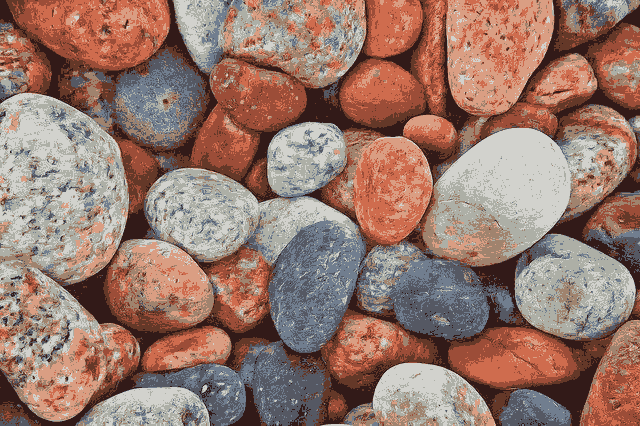

In [31]:
img_compressed

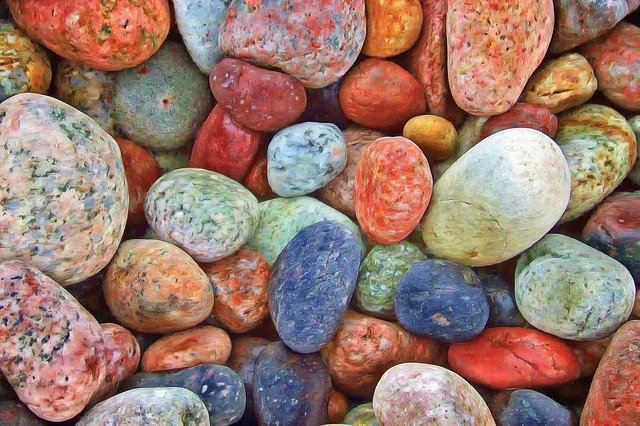

In [32]:
img_original

In [33]:
img_compressed.save("stones_compressed.jpg") 